### 1 - Creare un df con i prezzi di Netflix e dell'indice Nasdaq

- Scaricare i dati usando PandasReader dal 1/1/2010
- salvare le serie in due df

In [1]:
from datetime import date, datetime
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

In [ ]:
start_date = '2010-01-01'
end_date = datetime.today()

In [ ]:
NFLXdf = web.get_data_yahoo('NFLX', start_date, end_date) 

In [ ]:
NASDAQdf = web.get_data_yahoo('^NDX', start_date, end_date)

In [ ]:
NFLXdf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.961428,7.565714,7.930000,7.640000,17240076.0,7.640000
2010-01-05,7.657142,7.258571,7.657142,7.358571,23753443.0,7.358571
2010-01-06,7.672857,7.197142,7.361428,7.617142,23294558.0,7.617142
2010-01-07,7.757142,7.462942,7.732857,7.485714,9955204.0,7.485714
2010-01-08,7.742857,7.465714,7.478571,7.614285,8180697.0,7.614285


In [ ]:
NASDAQdf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,1890.020020,1881.630005,1882.689941,1886.699951,1931380000,1886.699951
2010-01-05,1891.329956,1877.520020,1887.280029,1888.430054,2367860000,1888.430054
2010-01-06,1893.209961,1873.900024,1887.910034,1878.420044,2253340000,1878.420044
2010-01-07,1881.329956,1867.619995,1878.160034,1876.719971,2270050000,1876.719971
2010-01-08,1893.250000,1868.550049,1870.900024,1892.589966,2145390000,1892.589966


- verificare il tipo di dati
- trasformare le serie da giornaliere a mensili usando le medie giornaliere

In [ ]:
type(NFLXdf)

pandas.core.frame.DataFrame

In [ ]:
type(NASDAQdf)

pandas.core.frame.DataFrame

In [ ]:
NFLXdf.shape

(2991, 6)

In [ ]:
NFLXdf = NFLXdf.groupby(pd.Grouper(freq='M')).mean()
NASDAQdf = NASDAQdf.groupby(pd.Grouper(freq='M')).mean()

In [ ]:
NFLXdf.shape

(143, 6)

- selezionare da ciascun df la sola colonna dei prezzi di chisura
- creare un nuovo df che contenga le due serie
- fare un grafico

In [ ]:
NFLX_NASDAQ = pd.concat([NFLXdf['Adj Close'], NASDAQdf['Adj Close']], axis = 1)
NFLX_NASDAQ.columns = ["NFLX", "NASDAQ"]
NFLX_NASDAQ.head()

,NFLX,NASDAQ
Date,,
2010-01-31,7.559173,1850.219470
2010-02-28,9.061353,1784.734735
2010-03-31,10.148199,1920.616078
2010-04-30,12.803674,2010.960013
2010-05-31,14.558714,1892.732996


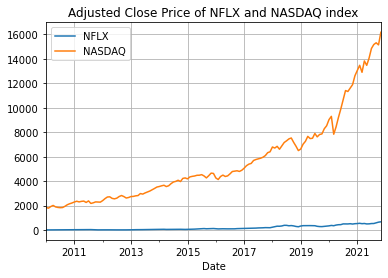

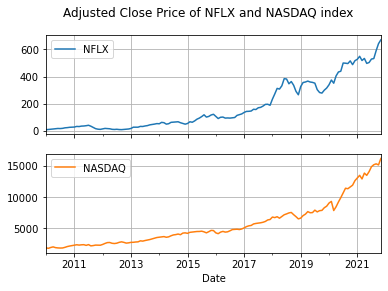

In [ ]:
NFLX_NASDAQ.plot(grid=True, title = 'Adjusted Close Price of NFLX and NASDAQ index');
NFLX_NASDAQ.plot(grid = True, subplots = True, title =  'Adjusted Close Price of NFLX and NASDAQ index');

### 2 - Calcolare i rendimenti logaritmici delle due serie, fare il grafico della distribuzione dei rendimenti

-  calcolo i rendimenti e creo un nuovo df

In [ ]:
NFLX_NASDAQ_rtn = np.log(NFLX_NASDAQ/NFLX_NASDAQ.shift(1))
NFLX_NASDAQ_rtn.head()

,NFLX,NASDAQ
Date,,
2010-01-31,NaN,NaN
2010-02-28,0.181257,-0.036034
2010-03-31,0.113278,0.073376
2010-04-30,0.232436,0.045966
2010-05-31,0.128458,-0.060590


In [ ]:
NFLX_NASDAQ_rtn = NFLX_NASDAQ_rtn.dropna()

In [ ]:
NFLX_NASDAQ_rtn.head(10)

,NFLX,NASDAQ
Date,,
2010-02-28,0.181257,-0.036034
2010-03-31,0.113278,0.073376
2010-04-30,0.232436,0.045966
2010-05-31,0.128458,-0.060590
2010-06-30,0.135152,-0.024364
2010-07-31,-0.038303,-0.010870
2010-08-31,0.090511,0.006475
2010-09-30,0.195687,0.053365
2010-10-31,0.067801,0.062995


- fare il grafico dei rendimenti e della loro distribuzione

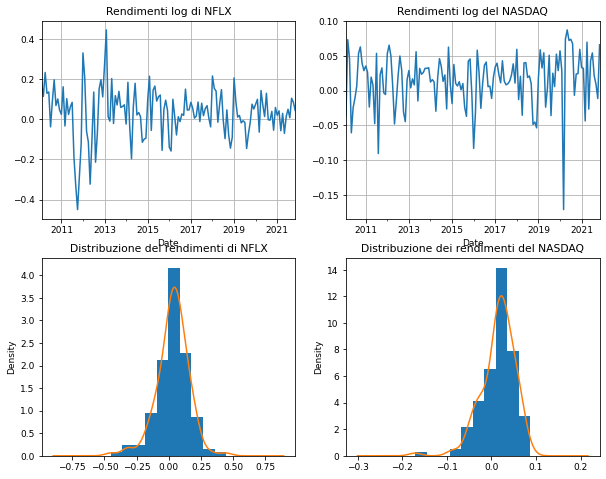

In [ ]:
plt.figure(figsize=(10, 8))
plt.rc('font', size=9)
plt.subplot(221)
NFLX_NASDAQ_rtn['NFLX'].plot(grid=True, title = 'Rendimenti log di NFLX')
plt.subplot(222)
NFLX_NASDAQ_rtn['NASDAQ'].plot(grid=True, title = 'Rendimenti log del NASDAQ')
plt.subplot(223)
plt.hist(NFLX_NASDAQ_rtn['NFLX'], density = True)
plt.title('Distribuzione dei rendimenti di NFLX')
NFLX_NASDAQ_rtn['NFLX'].plot.density()
plt.subplot(224)
plt.hist(NFLX_NASDAQ_rtn['NASDAQ'], density = True)
plt.title('Distribuzione dei rendimenti del NASDAQ')
NFLX_NASDAQ_rtn['NASDAQ'].plot.density();




### 3 - Esempio con Netflix e Amazon

In [ ]:
NFLXdf = web.get_data_yahoo('NFLX', start_date, end_date)
NFLXdf = NFLXdf.groupby(pd.Grouper(freq='M')).mean()
AMZNdf = web.get_data_yahoo('AMZN', start_date, end_date)
AMZNdf = AMZNdf.groupby(pd.Grouper(freq='M')).mean()

In [ ]:
NFLX = np.log(NFLXdf['Adj Close']/NFLXdf['Adj Close'].shift(1))
NFLX.head()
NFLX.dropna()
NFLX.name = 'NFLX_rtn'
NFLX.head()

Date
2010-01-31         NaN
2010-02-28    0.181257
2010-03-31    0.113278
2010-04-30    0.232436
2010-05-31    0.128458
Freq: M, Name: NFLX_rtn, dtype: float64

In [ ]:
AMZN = np.log(AMZNdf['Adj Close']/AMZNdf['Adj Close'].shift(1))
AMZN.head()
AMZN.dropna()
AMZN.name = 'AMZN_rtn'
AMZN.head()

Date
2010-01-31         NaN
2010-02-28   -0.076650
2010-03-31    0.103551
2010-04-30    0.074842
2010-05-31   -0.100309
Freq: M, Name: AMZN_rtn, dtype: float64

### Analisi dei dati


Calcolare media. varianza, deviazione standard, asimmetria e kurtosi delle due serie di rendimenti

In [ ]:
#Media

print(round(NFLX.mean(), 4))
print(round(AMZN.mean(), 4))

0.0315
0.0233


In [ ]:
#Varianza

print(round(NFLX.var(), 4))
print(round(AMZN.var(), 4))

0.0152
0.0044


In [ ]:
#Deviazione standard

print(round(NFLX.std(), 4))
print(round(AMZN.std(), 4))

0.1232
0.066


In [ ]:
#Asimmetria (skew)

print(round(NFLX.skew(), 4))
print(round(AMZN.skew(), 4))

-0.5629
-0.1191


In [ ]:
#Kurtosi (skew)

print(round(NFLX.kurtosis(), 4))
print(round(AMZN.kurtosis(), 4))

2.3516
-0.0451


- Fare un istogramma dei rendimenti con relativa distribuzione di densità
- fare il grafico di confronto dei quantili
- fare un boxplot che evidenzi gli outliers

<AxesSubplot:title={'center':'Rendimenti di NFLX'}>

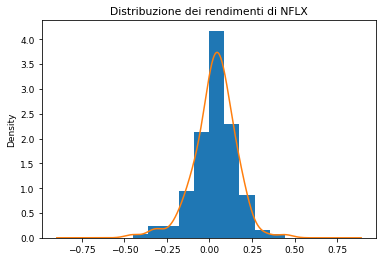

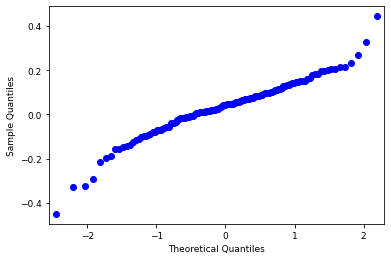

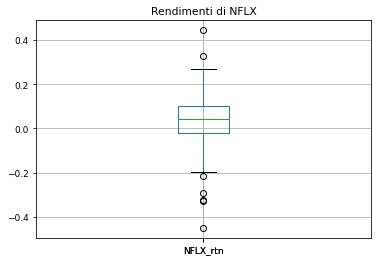

In [ ]:
plt.figure()
plt.hist(NFLX, density = True)
plt.title('Distribuzione dei rendimenti di NFLX')
CC

import statsmodels.api as sm
sm.qqplot(NFLX, line = 's')

plt.figure()

plt.boxplot(NFLX, sym = 'x')
plt.title('Rendimenti di NFLX')
NFLX.to_frame().boxplot()

<AxesSubplot:title={'center':'Rendimenti di AMZN'}>

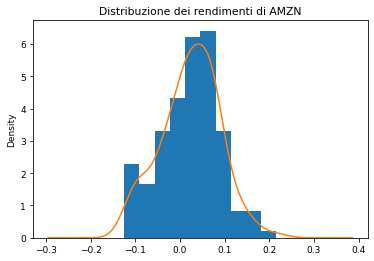

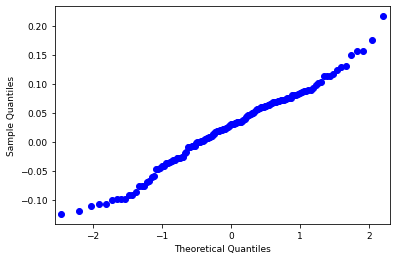

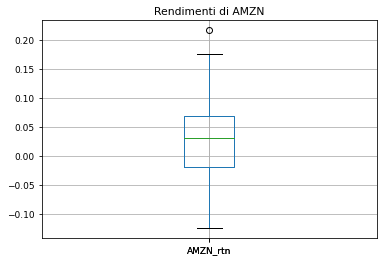

In [ ]:
plt.figure()
plt.hist(AMZN, density = True)
plt.title('Distribuzione dei rendimenti di AMZN')
AMZN.plot.density()

import statsmodels.api as sm
sm.qqplot(AMZN, line = 's')

plt.figure()

plt.boxplot(AMZN, sym = 'x')
plt.title('Rendimenti di AMZN')
AMZN.to_frame().boxplot()